# Chi-Squared Test

The **Chi-Squared test (Χ²)** is a statistical method used to assess whether there is a significant difference between observed and expected frequencies in categorical data. It’s commonly used for testing relationships between categorical variables. The two main types of chi-squared tests are:

1. **Chi-Squared Goodness of Fit Test**: Checks if the observed distribution fits a specified distribution.
2. **Chi-Squared Test of Independence**: Determines if two categorical variables are independent or related.

---

## Example: Chi-Squared Test of Independence

Imagine a study that investigates the relationship between **gender** (male/female) and **political party preference** (Republican/Democrat/Independent) in a sample of 500 voters.
### Observed Data:
<center>


| Gender | Republican | Democrat | Independent | Total |
|--------|------------|----------|-------------|-------|
| Male   | 120        | 90       | 40          | 250   |
| Female | 110        | 95       | 45          | 250   |
| **Total**  | 230        | 185      | 85          | 500   |

</center>

---

## Steps for Chi-Squared Test

### 1. State the Hypotheses

- **Null Hypothesis (H₀)**: Gender and political party preference are independent.
- **Alternative Hypothesis (H₁)**: There is an association between gender and political party preference.

---

### 2. Calculate Expected Frequencies

The expected frequency for each cell is calculated as:

$$
E_{ij} = \frac{(\text{Row Total}_i) \times (\text{Column Total}_j)}{\text{Grand Total}}
$$


Using this formula, we calculate the expected frequencies:

<center>

| Gender | Republican | Democrat | Independent |
|--------|------------|----------|-------------|
| Male   | 115        | 92.5     | 42.5        |
| Female | 115        | 92.5     | 42.5        |

</center>

---

### 3. Compute the Chi-Square Statistic

The formula for the Chi-Square statistic is:

$$
\chi^2 = \sum_{i=1}^{n} \frac{(O_i - E_i)^2}{E_i}
$$

Where:
- $O_i$ is the observed frequency in cell $i$
- $E_i$ is the expected frequency in cell $i$

For each cell:

<center>

| Cell                  | Observed | Expected | $$ \frac{(O_i - E_i)^2}{E_i} $$ |
|-----------------------|----------|----------|-------------------------------|
| Male-Republican       | 120      | 115      | 0.217                         |
| Male-Democrat         | 90       | 92.5     | 0.068                         |
| Male-Independent      | 40       | 42.5     | 0.147                         |
| Female-Republican     | 110      | 115      | 0.217                         |
| Female-Democrat       | 95       | 92.5     | 0.068                         |
| Female-Independent    | 45       | 42.5     | 0.147                         |
|Sum                    |          |          |$$ \chi^2 \approx 0.864 $$     |

</center>

Summing these values gives:


---

### 4. Degrees of Freedom

The degrees of freedom (df) for a contingency table are calculated as:

$$
df = (r - 1) \times (c - 1)
$$

Where $ r $ is the number of rows and $ c$ is the number of columns. In this case:

$$
df = (2 - 1) \times (3 - 1) = 2
$$

---

### 5. Find the Critical Value and P-Value

For $ df = 2 $ and a significance level $ \alpha = 0.05 $, the critical value from the Chi-Squared distribution table is **5.991**. Since $ \chi^2 = 0.864 $ is less than 5.991, we fail to reject the null hypothesis.

The p-value corresponding to $ \chi^2 = 0.864 $ is approximately **0.649**, which is greater than 0.05, so there is **no significant association** between gender and political party preference.


In [ ]:
import numpy as np
from scipy import stats

In [ ]:
observed = np.array([[30, 10],
                     [20, 30]])

In [ ]:
chi_squared_statistic, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-squared Statistic: {chi_squared_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

Chi-squared Statistic: 9.65
P-value: 0.0019


In [ ]:
print("Expected Frequencies:")
print(expected)

Expected Frequencies:
[[22.22222222 17.77777778]
 [27.77777778 22.22222222]]


In [ ]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant association between the variables.")
else:
    print("Fail to reject the null hypothesis: No significant association between the variables.")


Reject the null hypothesis: Significant association between the variables.


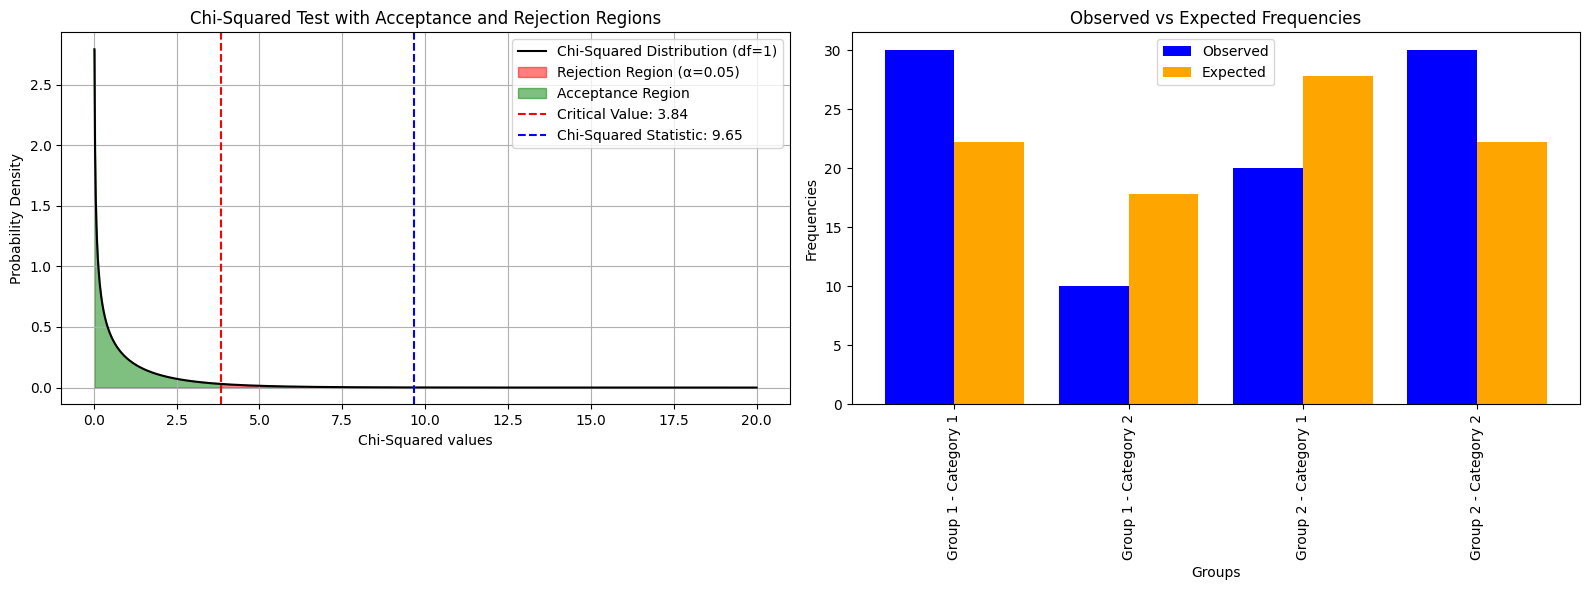

In [ ]:
alpha = 0.05
chi_critical = chi2.ppf(1 - alpha, dof)

x_chi = np.linspace(0, 20, 1000)
y_chi = chi2.pdf(x_chi, dof)

labels = ['Group 1', 'Group 2']
observed_values = observed.flatten()
expected_values = expected.flatten()
x_bar = np.arange(len(labels) * 2)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Chi-Squared distribution with rejection and acceptance regions
axes[0].plot(x_chi, y_chi, label=f'Chi-Squared Distribution (df={dof})', color='black')
axes[0].fill_between(x_chi, y_chi, where=(x_chi >= chi_critical), color='red', alpha=0.5, label=f'Rejection Region (α={alpha})')
axes[0].fill_between(x_chi, y_chi, where=(x_chi < chi_critical), color='green', alpha=0.5, label='Acceptance Region')
axes[0].axvline(chi_critical, color='red', linestyle='--', label=f'Critical Value: {chi_critical:.2f}')
axes[0].axvline(chi_statistic, color='blue', linestyle='--', label=f'Chi-Squared Statistic: {chi_statistic:.2f}')
axes[0].set_title('Chi-Squared Test with Acceptance and Rejection Regions')
axes[0].set_xlabel('Chi-Squared values')
axes[0].set_ylabel('Probability Density')
axes[0].legend()
axes[0].grid(True)

# Plot 2: Bar chart comparing observed vs expected frequencies
axes[1].bar(x_bar - 0.2, observed_values, 0.4, label='Observed', color='blue')
axes[1].bar(x_bar + 0.2, expected_values, 0.4, label='Expected', color='orange')
axes[1].set_xlabel('Groups')
axes[1].set_ylabel('Frequencies')
axes[1].set_title('Observed vs Expected Frequencies')
axes[1].set_xticks(x_bar)
axes[1].set_xticklabels(['Group 1 - Category 1', 'Group 1 - Category 2', 'Group 2 - Category 1', 'Group 2 - Category 2'], rotation=90)
axes[1].legend()

# Show the combined plot
plt.tight_layout()
plt.show()


# Independent Two-Sample T-Test

A **t-test** is a statistical method used to determine if there is a significant difference between the means of two groups or a sample mean and a population mean. The **Independent Two-Sample T-Test** is specifically used to compare the means of two independent groups. It assumes that the samples are drawn from normally distributed populations and that the variances of the two groups are equal.

---

## Example: Exam Scores Study

Consider a study where we compare the exam scores of two groups of students who studied using different methods. The data are as follows:

<center>

| Group A            | Group B            |
|--------------------|--------------------|
|85                  |80                  |
|90                  |70                  |
|88                  |78                  |
|75                  |85                  |
|95                  |90                  |

</center>

---


## Hypotheses

The test begins by stating the null and alternative hypotheses:

- **Null Hypothesis (H₀)**: There is no significant difference between the means of the two groups.
  $$
  H_0: \mu_1 = \mu_2
  $$
- **Alternative Hypothesis (H₁)**: There is a significant difference between the means of the two groups.
  $$
  H_1: \mu_1 \neq \mu_2
  $$

---

## Mathematical Formula for the T-Test

The formula for the independent two-sample t-test is:

$$
t = \frac{\bar{X}_1 - \bar{X}_2}{S_p \cdot \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}
$$

Where:
- $\bar{X}_1$ and $\bar{X}_2$ are the sample means of groups 1 and 2.
- $n_1$ and $n_2$ are the sample sizes of groups 1 and 2.
- $S_p$ is the pooled standard deviation, calculated as:

$$
S_p = \sqrt{\frac{(n_1 - 1)S_1^2 + (n_2 - 1)S_2^2}{n_1 + n_2 - 2}}
$$

Where $S_1^2$ and $S_2^2$ are the sample variances of the two groups.



### Step-by-Step Calculation

#### 1. Calculate Sample Means

$$
\bar{X}_1 = \frac{85 + 90 + 88 + 75 + 95}{5} = 86.6
$$

$$
\bar{X}_2 = \frac{80 + 70 + 78 + 85 + 90}{5} = 80.6
$$

---

#### 2. Calculate Sample Variances

For Group 1:

$$
S_1^2 = \frac{(85 - 86.6)^2 + (90 - 86.6)^2 + (88 - 86.6)^2 + (75 - 86.6)^2 + (95 - 86.6)^2}{4} = 67.3
$$

For Group 2:

$$
S_2^2 = \frac{(80 - 80.6)^2 + (70 - 80.6)^2 + (78 - 80.6)^2 + (85 - 80.6)^2 + (90 - 80.6)^2}{4} = 66.8
$$

---

#### 3. Calculate the Pooled Standard Deviation

$$
S_p = \sqrt{\frac{(5-1)67.3 + (5-1)66.8}{5+5-2}} = \sqrt{\frac{269.2 + 267.2}{8}} = 8.18
$$

---

#### 4. Compute the T-Statistic

$$
t = \frac{86.6 - 80.6}{8.18 \cdot \sqrt{\frac{1}{5} + \frac{1}{5}}} = \frac{6}{8.18 \cdot \sqrt{0.4}} = \frac{6}{5.17} = 1.16
$$

---

## 5. Degrees of Freedom

The degrees of freedom for the independent t-test is calculated as:

$$
df = n_1 + n_2 - 2 = 5 + 5 - 2 = 8
$$

---

## 6. Critical Value and Conclusion

Using a t-distribution table with $df = 8$ and a significance level of $\alpha = 0.05$, the critical value is approximately **2.306**. Since our computed $t = 1.16$ is less than the critical value, we fail to reject the null hypothesis.

Thus, there is no significant difference between the exam scores of the two groups.

---

In [ ]:
group_a = np.array([85, 90, 88, 75, 95])
group_b = np.array([80, 70, 78, 85, 90])

In [ ]:
t_statistic, p_value = stats.ttest_ind(group_a, group_b)

print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 1.27
P-value: 0.2407


In [ ]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the groups.")


Fail to reject the null hypothesis: No significant difference between the groups.


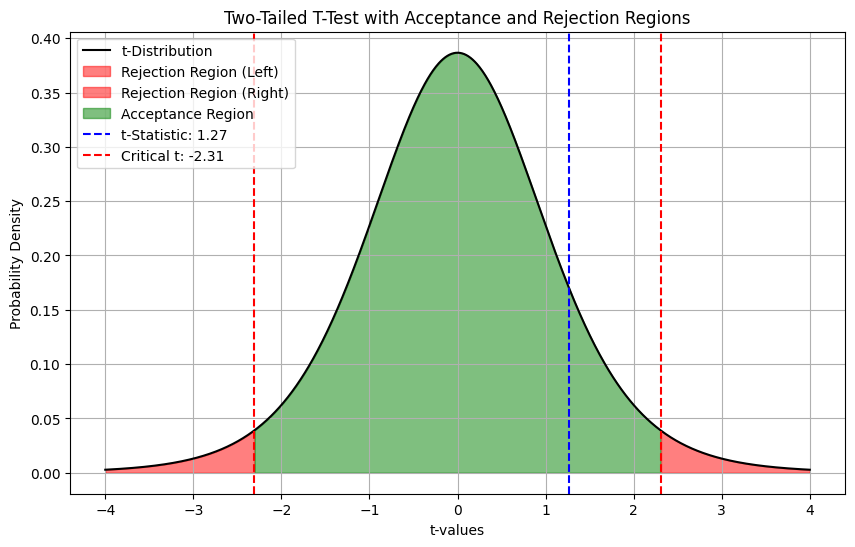

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

alpha = 0.05
df = len(group1) + len(group2) - 2

t_critical = stats.t.ppf(1 - alpha/2, df)

x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

plt.figure(figsize=(10,6))
plt.plot(x, y, label='t-Distribution', color='black')

plt.fill_between(x, y, where=(x < -t_critical), color='red', alpha=0.5, label='Rejection Region (Left)')
plt.fill_between(x, y, where=(x > t_critical), color='red', alpha=0.5, label='Rejection Region (Right)')

plt.fill_between(x, y, where=(x >= -t_critical) & (x <= t_critical), color='green', alpha=0.5, label='Acceptance Region')

plt.axvline(t_statistic, color='blue', linestyle='--', label=f't-Statistic: {t_statistic:.2f}')

plt.axvline(-t_critical, color='red', linestyle='--', label=f'Critical t: {-t_critical:.2f}')
plt.axvline(t_critical, color='red', linestyle='--')

plt.title('Two-Tailed T-Test with Acceptance and Rejection Regions')
plt.xlabel('t-values')
plt.ylabel('Probability Density')
plt.legend(loc='upper left')

plt.grid(True)
plt.show()
